# week8 class code

In [2]:
print("hello world! 1031--")

hello world! 1031--


In [4]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
def trans2show(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread("tangsan.jpg")
dog=cv2.imread("dog.png")
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

dog_gray = cv2.cvtColor(dog,cv2.COLOR_RGB2GRAY)



In [5]:
print(dog.shape)
print(img.shape)

(852, 590, 3)
(702, 1000, 3)


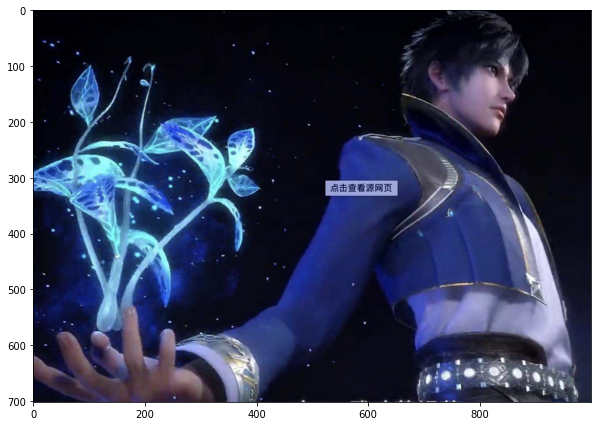

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(trans2show(img))
plt.show()

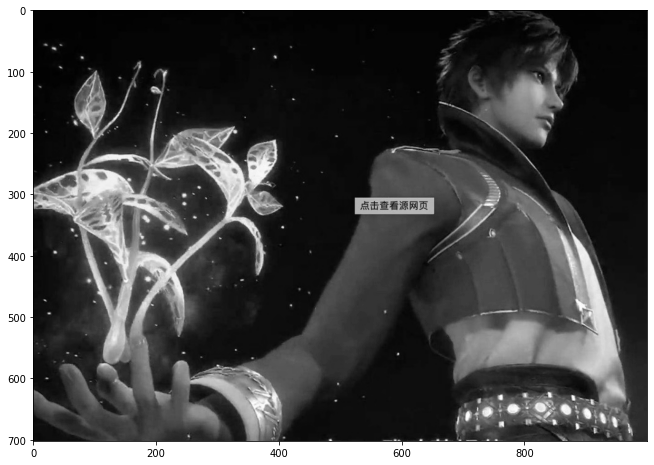

In [24]:
plt.figure(figsize=(11,11))
# cmap:color map
plt.imshow(gray,cmap='gray')
plt.show()

## 灰度变换

### 反色变换

In [8]:
# 白 255,
# 黑 0，
# 200， 55=255-200
# 色 + 反色 = 255
# R G B 
#255-R 255-G 255-B
# 0，0，0，---》 255，255，255
# 88，68，168 ---》 167，187，87

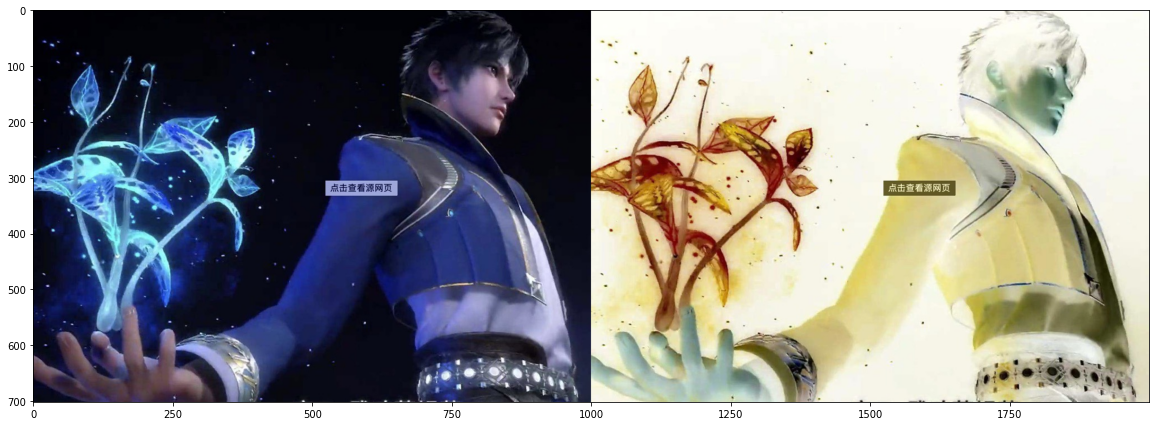

In [11]:
#反色变换
reverse_c=img.copy()
rows=img.shape[0]
cols=img.shape[1]
deeps=img.shape[2]
#for i in range(rows):
#    for j in range(cols):
#        for d in range(deeps):
#            reverse_c[i][j][d]=255-img[i][j][d]

reverse_c=255-img
cv2.imwrite("tangsan_img_reverse.jpg",cv2.hconcat([img,reverse_c]))
plt.figure(figsize=(20,20))
plt.imshow(trans2show(cv2.hconcat([img,reverse_c])))
plt.show()

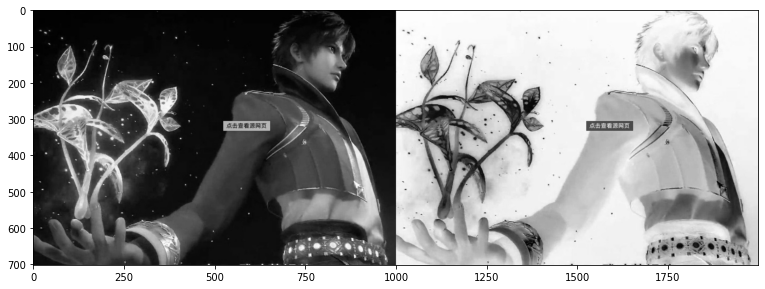

In [12]:
#反色变换
reverse_c=gray.copy()
rows=gray.shape[0]
cols=gray.shape[1]
#for i in range(rows):
#    for j in range(cols):
#            reverse_c[i][j]=255-reverse_c[i][j]

reverse_c = 255-reverse_c
cv2.imwrite("tangsan_img_reverse.jpg",cv2.hconcat([gray,reverse_c]))
plt.figure(figsize=(13,13))
plt.imshow(trans2show(cv2.hconcat([gray,reverse_c])))
plt.show()

### gamma变换，伽马变换

[125 141 149]
(852, 590, 3)
(852, 590, 3)


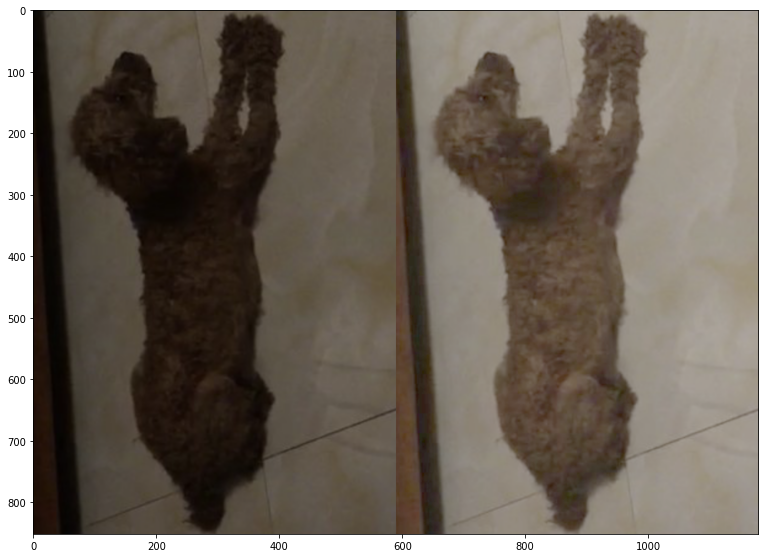

In [21]:
#伽马变换

#img = cv2.cvtColor(img,cv2.COLOR_RGB2BRG)
gamma_c=dog.copy()
rows=dog.shape[0]
cols=dog.shape[1]
deeps=dog.shape[2]
#for i in range(rows):
#    for j in range(cols):
#        for d in range(deeps):
#            gamma_c[i][j][d]=pow(float(gamma_c[i][j][d])/255.0,0.8)

import numpy as np
gamma_c = 255*np.power(gamma_c/255.0,0.5)
gamma_c = gamma_c.astype('uint8')

print(gamma_c[100,100,:])
print(gamma_c.shape)
print(dog.shape)


#cv2.imwrite("tangsan_img_gamma_c.jpg",cv2.hconcat([dog,gamma_c.astype('int8')]))
#os.system("open tangsan_img_gamma_c.jpg")
plt.figure(figsize=(13,13))
plt.imshow(trans2show(cv2.hconcat([dog,gamma_c])))
plt.show()

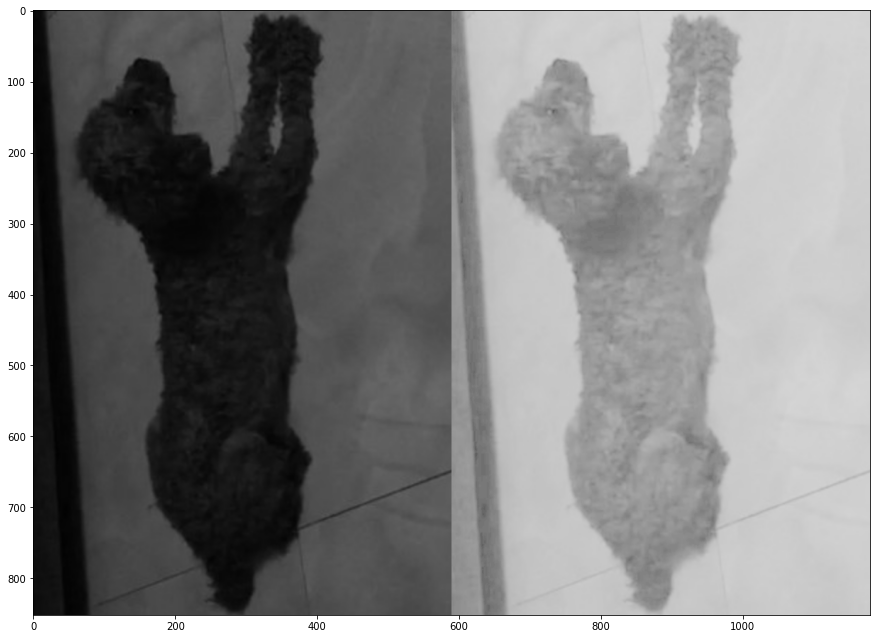

In [22]:
#伽马变换

#img = cv2.cvtColor(img,cv2.COLOR_RGB2BRG)
gamma_c=dog_gray.copy()
rows=dog_gray.shape[0]
cols=dog_gray.shape[1]
#for i in range(rows):
#    for j in range(cols):
#            gamma_c[i][j]=3*pow(gamma_c[i][j],0.9)

import numpy as np
gamma_c = 255*np.power(gamma_c/255.0,0.2)
gamma_c = gamma_c.astype('uint8')


#cv2.imwrite("tangsan_img_gamma_c.jpg",cv2.hconcat([dog_gray,gamma_c]))
#os.system("open tangsan_img_gamma_c.jpg")
plt.figure(figsize=(15,15))
plt.imshow(trans2show(cv2.hconcat([dog_gray,gamma_c])))
plt.show()

## 直方图与直方图均衡化【面试常考】

### 不同图片的直方图

In [25]:
# 直方图
img = gamma_c.copy()
import numpy as np
# 0,1,...255
hist = np.zeros(256)
rows = img.shape[0]
cols = img.shape[1]
for i in range(rows):
    for j in range(cols):
         tmp = img[i][j]
         hist[tmp]=hist[tmp]+1
         # hist[1] = hist[1]+1
print(hist.shape)
print(hist)

(256,)
[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.    46.     0.     0.     0.
     0.     0.     0.     0.   332.     0.     0.     0.     0.     0.
     0.  1467.     0.     0.     0.     0.  3801.     0.     0.     0.
  6553.     0.     0.     0.  5336.     0.     0.  4388.     0.     0.
  4988.     0.     0.  5539.     0.  6384.     0.     0.  6570.     0.

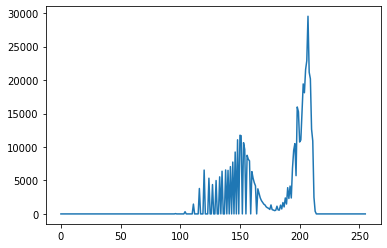

In [26]:
import matplotlib.pyplot as plt
#print(hist)
#plt.show(hist)
plt.plot(hist)
plt.show()

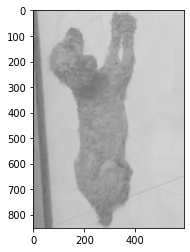

In [27]:
plt.imshow(trans2show(img))
plt.show()

In [28]:
# 直方图
import numpy as np
hist = np.zeros(256)
#import pdb
#pdb.set_traoce()
img = cv2.imread("hist.png")
rows = img.shape[0]
cols = img.shape[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
for i in range(rows):
    for j in range(cols):
         tmp = gray[i][j]
         hist[tmp]=hist[tmp]+1

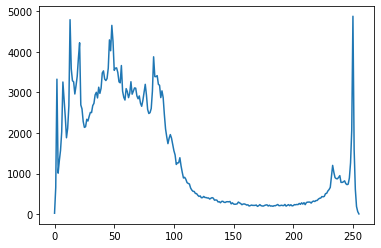

In [29]:
import matplotlib.pyplot as plt
#print(hist)
#plt.show(hist)
plt.plot(hist)
plt.show()

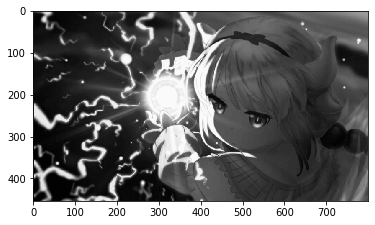

In [38]:
plt.imshow(gray,cmap='gray')
plt.show()

### 直方图均衡化

In [60]:
# i --> trans[i]
# hist:[1/9,2/9,1/9,2/9,1/9,1/9,1/9,0,....0]
# trans:[255/9,2*255/9,...]
trans = hist/(rows*cols)*255
for i in range(1,len(trans)):
    trans[i]=trans[i-1]+trans[i]
# trans: [255/9,255*3/9,255*4/9,255*6/9,255*7/9,255*8/9,255*9/9...]    
# 
# 0 -> trans[0]
# 1 -> trans[1]
# ...
# 254 -> trans[254]
# 255 -> trans[255]




In [61]:
print(int(trans[0]))
print(trans.shape)

0
(256,)


In [62]:
gray_h = gray.copy()
for i in range(rows):
    for j in range(cols):
        gray_h[i][j] = int(trans[gray[i][j]])

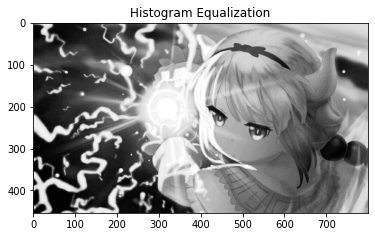

In [63]:
plt.imshow(gray_h,cmap='gray')
plt.title("Histogram Equalization")
plt.show()

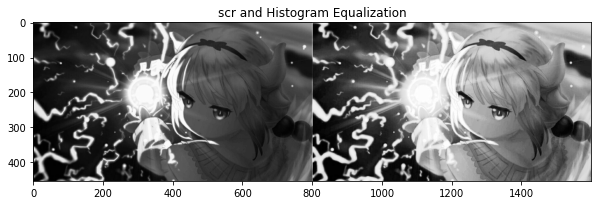

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.hconcat([gray,gray_h]),cmap='gray')
plt.title("scr and Histogram Equalization")
plt.show()

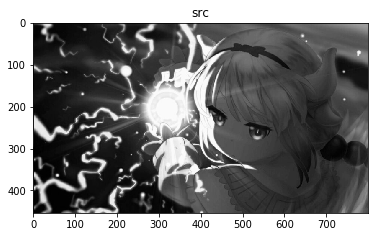

In [22]:
plt.imshow(gray,cmap='gray')
plt.title("src")
plt.show()

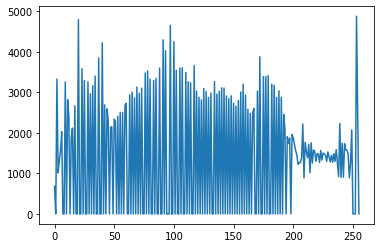

In [23]:
hist_h=np.zeros(256)
for i in range(rows):
    for j in range(cols):
         tmp = gray_h[i][j]
         hist_h[tmp]=hist_h[tmp]+1
plt.plot(hist_h)
plt.show()